# Heart Failure Clincal Records Analysis

## Introduction
Approximately 6 million in the United States are currently living with heart failure. Heart failure is a condition that causes the muscle in the heart wall to slowly weaken and enlarge, preventing the heart from pumping enough blood. Within a year, 87% of people with heart failure are alive. However, within five years, only 57% of people with heart failure are still alive. Ten years after diagnosis, only 35% of people with heart failure are alive. The leading causes of heart failure are high blood pressure and coronary artery disease. According to the CDC, 47% of Americans have high blood pressure. Clearly, heart failure is an important disease to research and understand. 

## Data
This dataset is from Kaggle and contains common variables that are used in predicting death from heart failure. The data is outlined as such: 

|Variable    |Description|
|:-----   |:-----|
|age |Age in years of the patient| 
|anaemia |Decrease of red blood cells or hemoglobin. 0: Patient does not have anaemia, 1: Patient has anaemia|
|creatinine_phosphokinase    |Level of the CPK enzyme in the blood (mcg/L) |
|diabetes      |If the patient has diabetes. 0: Patient does not have diabete, 1: Patient has diabetes |
|ejection_fraction      |Percentage of blood leaving the heart at each contraction |
|high_blood_pressure  |If the patient has hypertension. 0: Patient does not have hypertension, 1: Patient has hypertension |
|platelets   |Platelets in the blood |
|serum_creatinine |Level of serum creatinine in the blood (mg/dL)|
|serum_sodium |Level of serum sodium in the blood (mEq/L)|
|sex |Female: 0, Male: 1|
|smoking |If the patient smokes or not. 0: Patient does not smoke, 1: Patient smokes.|
|time |Follow-up period (days)|
|DEATH_EVENT |If the patient deceased during the follow-up period. 0: Patient not deceased, 1: Patient deceased|

## Background of Data
Anaemia is included in the dataset because anaemia is a condition where a patient has a decreased number of red blood cells in the blood; red blood cells carry oxygen around the body.

The level of creatinine phosphokinase is recorded in this dataset because a chronic deficiency of creatinine phosphokinase leads to heart failure. The creatine kinase (CK) energy transport and buffering system supports cardiac function at times of high demand and is impaired in the failing heart. Creatine kinase is the major phosphotransfer system in the heart linking energy production to energy utilisation. 

Ejection fraction is the percent of blood that is being pumped out of the heart each contraction. An ejection fraction below 40 percent means your heart isn't pumping enough blood and may be failing. The lower the ejection fraction, the more servere a patient's heart failure is. 

Platelet count is a variable we care about because heart failure affects platelet activation, function, as well as the production of platelets from megakaryocytes. Low platelet counts have been described in heart failure patients.

Serum creatinine is included in the dataset because it tells how well your kidneys are working and an elevated level has been associated with a higher mortality rate for the elderly with hypertension (high blood pressure).

Serum sodium is feature in the dataset because a low serum sodium level is typically defined as a serum sodium concentration of <135 mEq/L and is one of the most common biochemical disorders featured in heart failure patients, with a prevalence close to 25%.


## Goal of Analysis
I want to understand the distribution of the common predictors and characteristcs of heart failure (anaemia, deficiency of creatinine phosphokinase, an ejection fraction below 40%, low platelete counts, elevated serum creatinine, and a low serum sodium level) with demographic characterists (age, sex). We also want to investigate if high blood pressure is associated with smoking as smoking is a contributing cause to high blood pressure. 



## Data Cleaning and Evaluating

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/workspaces/heart_failure_predictors/00_source_data/heart_failure_clinical_records_dataset.csv')

In [15]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Normal CK levels can slightly vary from laboratory to laboratory. CK levels do vary depending on gender, race, age, muscle mass, and physical activity. In general, a healthy range in females is 30 to 145 U/L, and for males, it's 55 to 170 U/L, or 10 to 120 micrograms per liter (mcg/L) in general.

In [14]:
df['creatinine_phosphokinase'].describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

Given that about 32.1% of the patients in our dataset die within a year, it is not abnormal that over 50% of the creatinine phosphokinase levels are considered outside of the normal range. 

Ejection fraction is a percentage; A high function ejection fraction is above 70%. A normal ejection fraction is about 50% to 75%, according to the American Heart Association. A borderline ejection fraction can range between 41% and 50%. Function associated with possible heart failure is considered to be anything less than 40%. 

In [18]:
df['ejection_fraction'].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

Given our knowledge of ejection fraction, we note that our ejection fraction data are within normal bounds. 

A normal platelet count in adults ranges from 150,000 to 450,000 platelets per microliter of blood. A platelet count of less than 150,000 platelets per microliter is lower than normal.

In [31]:
df['platelets'].describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

Most platelet counts are within the normal range or in the low range which is what we expect for our data. Because a low platelet count is a associated with heart failure, we'll exclued any records with a platelet count greater than 450,000. We lose one record when we do this.

In [36]:
df = df[df['platelets'] > 45000]

In [13]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


ValueError: 'sex' is not a valid format string (unrecognized character 'e')

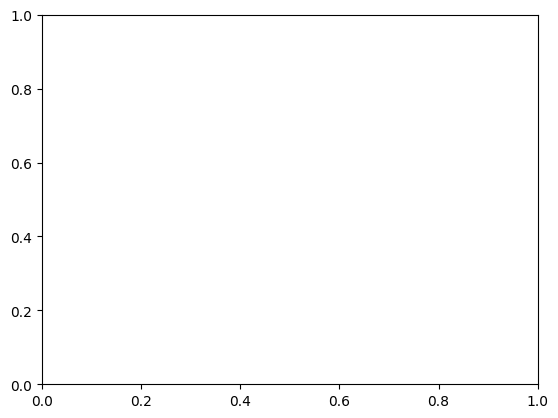

In [10]:
plt.plot(df['anaemia'], 'sex')
plt.xlabel("Minutes Played")
plt.ylabel("Saves Made")
plt.title("Saves and Minutes Played")
plt.show()

### Citations

[Data from Kaggle linked here](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)


[Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)